In [1]:
from eventregistry import *
import json, os, sys
import numpy as np
import time
import csv
import re
import pandas as pd
from bs4 import BeautifulSoup
import requests
import html

In [2]:
er = EventRegistry(apiKey = "95cce15e-ec95-488a-aaca-fd1dd1a34fec", allowUseOfArchive=False)

using user provided API key for making requests
Event Registry host: http://eventregistry.org
Text analytics host: http://analytics.eventregistry.org


### This API Call uses 1 Token, we can get a maximum of 100 news articles in 1 call.

In [7]:
q = QueryArticles(conceptUri = er.getConceptUri("Apple"), lang = "eng", dataType = ['news','pr'])
q.setRequestedResult(RequestArticlesInfo(page = 1, count = 100, sortBy = "sourceImportance", sortByAsc = False,
    returnInfo = ReturnInfo(articleInfo = ArticleInfoFlags(concepts = True, categories = True, image = True,storyUri = True,links = True,videos = True,extractedDates = True,socialScore = True))))
res = er.execQuery(q)

In [8]:
res

{'articles': {'page': 1,
  'totalResults': 45797,
  'pages': 458,
  'results': [{'uri': '6632538494',
    'lang': 'eng',
    'isDuplicate': True,
    'date': '2021-07-04',
    'time': '05:35:00',
    'dateTime': '2021-07-04T05:35:00Z',
    'dateTimePub': '2021-07-04T05:34:00Z',
    'dataType': 'news',
    'sim': 0,
    'url': 'https://ca.finance.yahoo.com/news/week-apps-ios-15-public-180047952.html',
    'title': 'This Week in Apps: iOS 15 public beta arrives, Android App Bundles to replace APKs, app consumer spend hits new record',
    'body': 'Welcome back to This Week in Apps, the weekly TechCrunch series that recaps the latest in mobile OS news, mobile applications and the overall app economy.\n\nThe app industry continues to grow, with a record 218 billion downloads and $143 billion in global consumer spend in 2020. Consumers last year also spent 3.5 trillion minutes using apps on Android devices alone. And in the U.S., app usage surged ahead of the time spent watching live TV. Cu

In [9]:
res['articles']['results'][0]['concepts'][0]['label']['eng']

'Venmo'

In [10]:
l = res['articles']['results']

concepts_list = []
for i in range(len(l)):
    art = l[i]
    art_concepts = art['concepts']
    
    for j in range(len(art_concepts)):
        concepts_list.append(art_concepts[j]['label']['eng'])

In [19]:
res = list(zip(*np.unique(concepts_list, return_counts=True)))

#### Output is the unique "concepts" in the first 100 news articles in the decreasing order of their frequency.

In [24]:
def Sort_Tuple(tup): 
    tup.sort(key = lambda x: x[1],reverse = True) 
    return tup

res_sorted = Sort_Tuple(res)

for i in range(len(res_sorted)):
    if(res_sorted[i][1] > 5):
        print("{} {}".format(res_sorted[i][0],res_sorted[i][1]))

Apple Inc. 100
PR Newswire 43
United States 41
Chief executive officer 25
Google 25
Amazon (company) 23
Facebook 21
China 19
Digital data 19
Twitter 17
Coronavirus 14
Mobile app 14
Samsung 14
Instagram 13
United States dollar 13
Microsoft 12
IPhone 11
Nasdaq 11
Smartphone 11
Europe 10
United Kingdom 10
Android (operating system) 9
Canada 9
India 9
Information technology 9
Japan 9
Marketing 9
North America 9
Spotify 9
Artificial intelligence 8
Health care 8
U.S. Securities and Exchange Commission 8
Economic growth 7
Fortune 500 7
Huawei 7
London 7
Mobile phone 7
Streaming media 7
Alphabet Inc. 6
Analytics 6
App Store (iOS) 6
Consumer electronics 6
Donald Trump 6
Entrepreneurship 6
Germany 6
Google Play 6
IPad 6
Internet 6
Los Angeles 6
New York City 6
Proprietary software 6
Roku 6
South Korea 6


### This API call uses 5 tokens, we get the Top 500 concepts according to their uniqueness (i.e concepts that are frequently mentioned in the results of our search query but less frequently mentioned in the news in general) among the first 20000 news articles.

In [26]:
q = QueryArticles(conceptUri = er.getConceptUri("Apple"), lang = "eng", dataType = ['news','pr'])
q.setRequestedResult(RequestArticlesConceptAggr(conceptCount = 500,
    conceptCountPerType = 125,
    conceptScoring = "uniqueness",
    articlesSampleSize = 20000,
    returnInfo = ReturnInfo()))
res1 = er.execQuery(q)

In [27]:
res1

{'conceptAggr': {'usedResults': 21810,
  'totalResults': 45871,
  'results': [{'uri': 'http://en.wikipedia.org/wiki/IPhone',
    'type': 'wiki',
    'label': {'eng': 'IPhone'},
    'score': 99.26633077329501},
   {'uri': 'http://en.wikipedia.org/wiki/Google',
    'type': 'org',
    'label': {'eng': 'Google'},
    'score': 56.9705450776931},
   {'uri': 'http://en.wikipedia.org/wiki/Mobile_app',
    'type': 'wiki',
    'label': {'eng': 'Mobile app'},
    'score': 55.79606678051887},
   {'uri': 'http://en.wikipedia.org/wiki/IPad',
    'type': 'wiki',
    'label': {'eng': 'IPad'},
    'score': 52.60109652581453},
   {'uri': 'http://en.wikipedia.org/wiki/Amazon_(company)',
    'type': 'org',
    'label': {'eng': 'Amazon (company)'},
    'score': 52.5058189139569},
   {'uri': 'http://en.wikipedia.org/wiki/IOS',
    'type': 'wiki',
    'label': {'eng': 'IOS'},
    'score': 49.41817711850738},
   {'uri': 'http://en.wikipedia.org/wiki/Android_(operating_system)',
    'type': 'wiki',
    'label'

In [28]:
concept_results = res1['conceptAggr']['results']
types = []
labels = []
for i in range(len(concept_results)):
    types.append(concept_results[i]['type'])
    labels.append(concept_results[i]['label']['eng'])

In [29]:
import pandas as pd
df = pd.DataFrame(list(zip(types, labels)), columns =['Type', 'Label'])
df.head()

Type             Label
0  wiki            IPhone
1   org            Google
2  wiki        Mobile app
3  wiki              IPad
4   org  Amazon (company)

In [31]:
df.to_csv("Apple_Concepts.csv",index = False)

In [32]:
df1 = df[df['Type'] == 'wiki']
df1

Type                              Label
0    wiki                             IPhone
2    wiki                         Mobile app
3    wiki                               IPad
5    wiki                                IOS
6    wiki         Android (operating system)
..    ...                                ...
494  wiki                   Physical fitness
495  wiki  Application programming interface
497  wiki                     News presenter
498  wiki           Chief technology officer
499  wiki           Mergers and acquisitions

[181 rows x 2 columns]

In [33]:
df1.to_csv("Apple_Concepts_wiki.csv",index = False)

In [34]:
df1 = df[df['Type'] == 'org']
df1.to_csv("Apple_Concepts_org.csv",index = False)

In [35]:
df1 = df[df['Type'] == 'loc']
df1.to_csv("Apple_Concepts_loc.csv",index = False)

In [36]:
df1 = df[df['Type'] == 'person']
df1.to_csv("Apple_Concepts_person.csv",index = False)

### This API Call uses 5 tokens, we can get the Top 100 keywords and their corresponding weights among the first 1000 news articles (We can find among the first 20000 articles, but it was very slow in my computer and thus EventRegistry gave an error and didn't return the result, so I have looked at 1000 news articles).

In [38]:
q = QueryArticles(conceptUri = er.getConceptUri("Apple"),lang = "eng",dataType = ['news','pr'])
q.setRequestedResult(RequestArticlesKeywordAggr(articlesSampleSize = 1000))
res2 = er.execQuery(q)

In [39]:
res2

{'keywordAggr': {'usedResults': 2000,
  'totalResults': 46136,
  'results': [{'keyword': '$', 'weight': 0.17536287009716034},
   {'keyword': 'iphone', 'weight': 0.15545756742358208},
   {'keyword': '%', 'weight': 0.13452613726258275},
   {'keyword': 'shares', 'weight': 0.12906737625598907},
   {'keyword': 'market', 'weight': 0.11152115836739543},
   {'keyword': 'battery', 'weight': 0.10744336247444156},
   {'keyword': 'pay', 'weight': 0.09934453666210175},
   {'keyword': 'magsafe', 'weight': 0.08934447169303895},
   {'keyword': 'users', 'weight': 0.08890413865447044},
   {'keyword': 'app', 'weight': 0.08852645009756088},
   {'keyword': 'stock', 'weight': 0.0867350921034813},
   {'keyword': 'pack', 'weight': 0.0843813940882683},
   {'keyword': 'ipad', 'weight': 0.08308355137705802},
   {'keyword': 'company', 'weight': 0.08068092167377472},
   {'keyword': 'report', 'weight': 0.0802491307258606},
   {'keyword': 'price', 'weight': 0.07619724608957767},
   {'keyword': 'year', 'weight': 0.07

In [40]:
keywords = []
weights = []
l = res2['keywordAggr']['results']
for i in range(len(l)):
    keywords.append(l[i]['keyword']) 
    weights.append(l[i]['weight'])
df1 = pd.DataFrame(list(zip(keywords,weights)),columns = ['Keywords','Weights'])

In [41]:
df1.to_csv("Apple_Keywords.csv",index = False)

In [44]:
#!pip install wordcloud               #### Uncomment if wordcloud not installed.
from wordcloud import WordCloud

In [45]:
import matplotlib.pyplot as plt

The output of the next cell is the WordCloud of the Top 100 Keywords

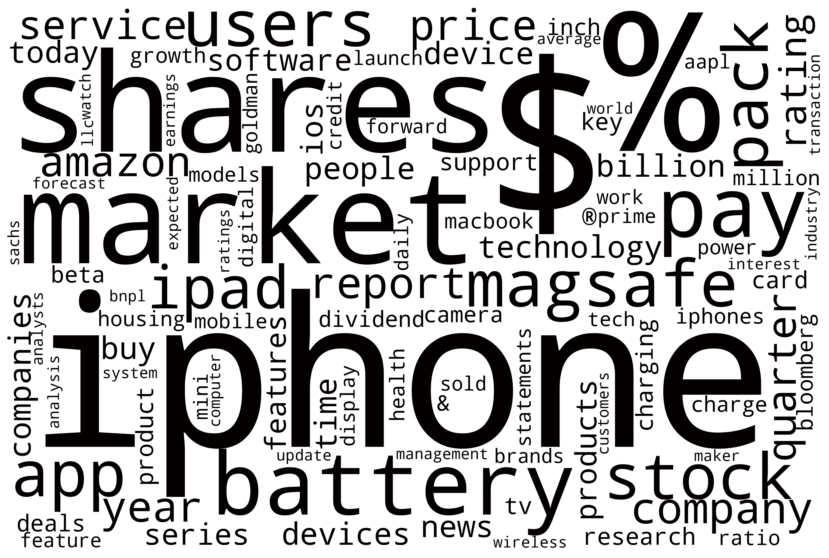

In [57]:
def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")

d = {}
for i in range(len(keywords)):
    d[keywords[i]] = weights[i]
    
wordcloud = WordCloud(background_color="white", width=3000, height=2000).generate_from_frequencies(d)
wordcloud.recolor(color_func = black_color_func)
plt.figure(figsize=[15,10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('Apple_Keywords_image.png')

There are some strings in there that are not words (for example $, % etc.) so the following cells remove those from the WordCloud.

In [65]:
import re
r = re.compile(r'[a-zA-Z].*')
mask = []
for i in range(len(keywords)):
    a = r.search(keywords[i])
    if(a == None):
        mask.append(i)
df2 = df1.drop(mask,axis = 0)
df2.to_csv("Apple_good_keywords.csv",index = False)

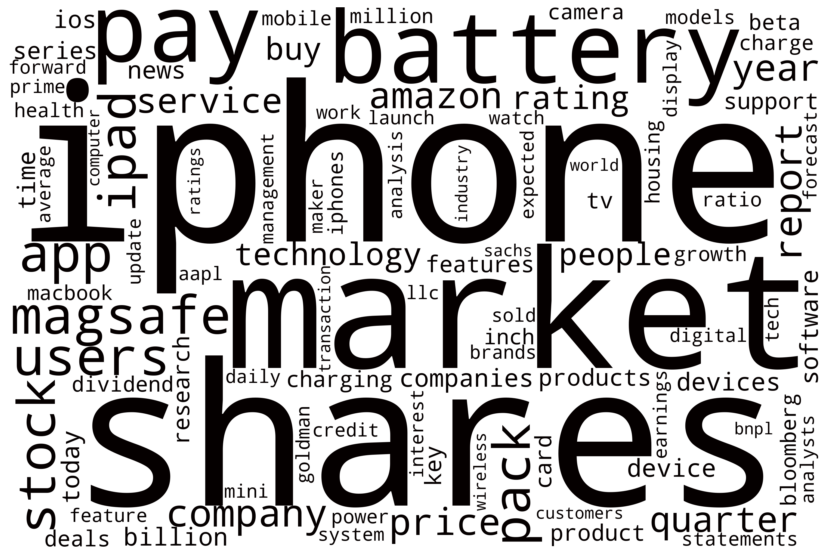

In [67]:
keywords_1 = df2['Keywords'].to_list()
weights_1 = df2['Weights'].to_list()

def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")

d = {}
for i in range(len(keywords_1)):
    d[keywords_1[i]] = weights_1[i]
    
wordcloud = WordCloud(background_color="white", width=3000, height=2000).generate_from_frequencies(d)
wordcloud.recolor(color_func = black_color_func)
plt.figure(figsize=[15,10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('Apple_Keywords_image_1.png')

The above image is a WordCloud of only words.

### This API Call takes 5 Tokens and gives the Top 500 concepts based on their frequencies in the Top 20000 news articles, we will form a WordCloud of those also.

In [68]:
q = QueryArticles(conceptUri = er.getConceptUri("Apple"), lang = "eng", dataType = ['news','pr'])
q.setRequestedResult(RequestArticlesConceptAggr(conceptCount = 500,
    conceptCountPerType = 125,
    conceptScoring = "frequency",
    articlesSampleSize = 20000,
    returnInfo = ReturnInfo()))
res3 = er.execQuery(q)

In [72]:
res3['conceptAggr']['results'][0]

{'uri': 'http://en.wikipedia.org/wiki/IPhone',
 'type': 'wiki',
 'label': {'eng': 'IPhone'},
 'score': 36.20492141318792}

### We will now form a word cloud of the Top 50 'concepts' that are of type either wiki or person (There are 4 types; wiki, person, loc and org).

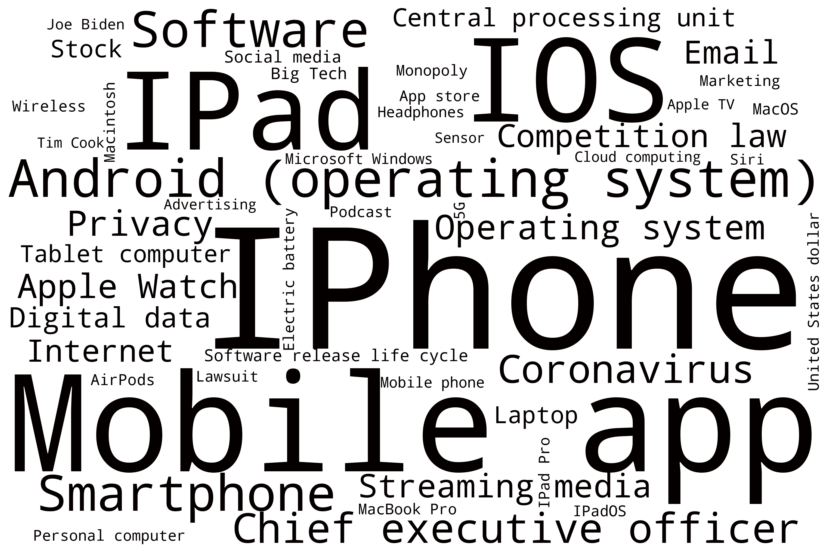

In [83]:
label = []
score = []
a = res3['conceptAggr']['results']
concept_type_list = ['wiki','person']
for i in range(len(a)):
    elem = a[i]
    if(elem['type'] in concept_type_list):
        label.append(elem['label']['eng'])
        score.append(elem['score'])

        
s_min = min(score)
s_range = max(score) - s_min
normed_score = [(i - s_min)/s_range for i in score]

def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")

d = {}
for i in range(len(label)):
    d[label[i]] = normed_score[i]
    
wordcloud = WordCloud(background_color="white", width=3000, height=2000,max_words = 50).generate_from_frequencies(d)
wordcloud.recolor(color_func = black_color_func)
plt.figure(figsize=[15,10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('Apple_Concepts_image.png')

### This is the code to get the News Articles published in the last 120 minutes (the input to the paramater updatesAfterMinsAgo).

In [88]:
q = QueryArticles(conceptUri = er.getConceptUri("Apple"), lang = "eng", dataType = ['news','pr'])
q.setRequestedResult(RequestArticlesRecentActivity(maxArticleCount = 100,
    updatesAfterMinsAgo = 120,
    returnInfo = ReturnInfo(articleInfo = ArticleInfoFlags(concepts = True, categories = True, image = True,storyUri = True,links = True,videos = True,extractedDates = True,socialScore = True))))
res4 = er.execQuery(q)

In [90]:
recent_articles_list = res4['recentActivityArticles']['activity']

In [91]:
print(len(recent_articles_list))

118


In [105]:
sentences_list = []
for j in range(len(recent_articles_list)):
    s = recent_articles_list[j]['body'].split("\n")
    for i in range(len(s)):
        if(i%2 == 0):
            sentences_list.append(s[i][:-1])
words_list = []
for i in range(len(sentences_list)):
    sentence = sentences_list[i]
    word_list = sentence.split(" ")
    for word in word_list:
        words_list.append(word)

In [106]:
words = " ".join(words_list)

### The next word cloud gives a overview of the Top 100 most used words in the news articles published in the last 2 hrs.

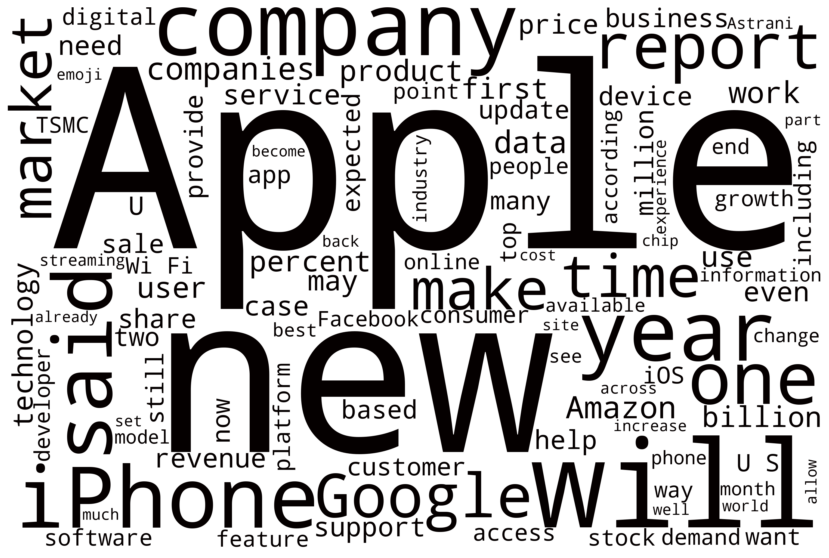

In [111]:
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 3000, height = 2000, background_color ='white', stopwords = stopwords, min_font_size = 10,max_words = 100).generate(words)
wordcloud.recolor(color_func = black_color_func) 
plt.figure(figsize=[15,10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig("Apple_5.30to7.30.png")

## Code to get recent Articles for all companies at the same time.

In [211]:
df = pd.read_csv("fortune2021.csv")
companies = df['company']
concept_uri_list = []
for i in range(len(companies)):
    concept_uri_list.append(er.getConceptUri(companies[i]))

### The above code gets the ConceptURI for the Fortune 1000 companies.

In [212]:
count = 0
for j in concept_uri_list:
    if(j == None):
        count += 1
print(count)

182


#### For 182 companies, there is no "concept" so we either do a wiki search ourselves to find the concept or we use the company name and search it as a keyword. But first we will look at how to get the news articles published in the last 30 minutes for the First 20 companies according to their fortune rank.

In [213]:
concept_uri_list_non_NONE = []
for i in concept_uri_list:
    if(i != None):
        concept_uri_list_non_NONE.append(i)

In [214]:
first20concepts = concept_uri_list_non_NONE[0:20]

In [215]:
first20concepts

['http://en.wikipedia.org/wiki/Walmart',
 'http://en.wikipedia.org/wiki/Amazon_(company)',
 'http://en.wikipedia.org/wiki/Apple_Inc.',
 'http://en.wikipedia.org/wiki/CVS_Health',
 'http://en.wikipedia.org/wiki/UnitedHealth_Group',
 'http://en.wikipedia.org/wiki/Berkshire_Hathaway',
 'http://en.wikipedia.org/wiki/McKesson_Corporation',
 'http://en.wikipedia.org/wiki/AmerisourceBergen',
 'http://en.wikipedia.org/wiki/Alphabet_Inc.',
 'http://en.wikipedia.org/wiki/ExxonMobil',
 'http://en.wikipedia.org/wiki/AT&T',
 'http://en.wikipedia.org/wiki/Costco',
 'http://en.wikipedia.org/wiki/Cigna',
 'http://en.wikipedia.org/wiki/Cardinal_Health',
 'http://en.wikipedia.org/wiki/Microsoft',
 'http://en.wikipedia.org/wiki/Walgreens_Boots_Alliance',
 'http://en.wikipedia.org/wiki/Kroger',
 'http://en.wikipedia.org/wiki/The_Home_Depot',
 'http://en.wikipedia.org/wiki/JPMorgan_Chase',
 'http://en.wikipedia.org/wiki/Verizon_Communications']

#### The following is code to get the news articles for the first 20 companies(in 1 API call) that were published in the last 30 minutes. It costs 1 Token for 100 news articles. 

In [216]:
q = QueryArticles(conceptUri = QueryItems.OR(first20concepts), categoryUri =  er.getCategoryUri("Business"), lang = "eng", dataType = ['news','pr'])
q.setRequestedResult(RequestArticlesRecentActivity(maxArticleCount = 100,
    updatesAfterMinsAgo = 30,
    returnInfo = ReturnInfo(articleInfo = ArticleInfoFlags(concepts = True, categories = True, image = True,storyUri = True,links = True,videos = True,extractedDates = True,socialScore = True))))
res5 = er.execQuery(q)

In [217]:
print(len(res5['recentActivityArticles']['activity']))

81


The below code finds out the company about which the different news articles are about.

In [218]:
art = res5['recentActivityArticles']['activity']
art_comp = []
for i in art:
    i_concepts = []
    for j in i['concepts']:
        i_concepts.append(j['uri'])
    for a in range(len(first20concepts)):
        k = first20concepts[a]
        if(k in i_concepts):
            art_comp.append(companies[a])
art_comp

['Amazon',
 'JPMorgan Chase',
 'Verizon Communications',
 'Amazon',
 'Apple',
 'Amazon',
 'Walmart',
 'Berkshire Hathaway',
 'Alphabet',
 'JPMorgan Chase',
 'JPMorgan Chase',
 'Apple',
 'Microsoft',
 'Apple',
 'Exxon Mobil',
 'Microsoft',
 'Amazon',
 'Apple',
 'JPMorgan Chase',
 'Verizon Communications',
 'AT&T',
 'Berkshire Hathaway',
 'Amazon',
 'Microsoft',
 'Microsoft',
 'Microsoft',
 'JPMorgan Chase',
 'Verizon Communications',
 'Amazon',
 'Walmart',
 'Walmart',
 'Amazon',
 'JPMorgan Chase',
 'Berkshire Hathaway',
 'Microsoft',
 'Exxon Mobil',
 'Apple',
 'Apple',
 'Apple',
 'Walmart',
 'Amazon',
 'Microsoft',
 'Amazon',
 'Apple',
 'Amazon',
 'Amazon',
 'Apple',
 'Alphabet',
 'Microsoft',
 'Microsoft',
 'Amazon',
 'Microsoft',
 'Kroger',
 'JPMorgan Chase',
 'Verizon Communications',
 'Walmart',
 'Apple',
 'Berkshire Hathaway',
 'McKesson',
 'Exxon Mobil',
 'Microsoft',
 'Amazon',
 'Amazon',
 'Alphabet',
 'Microsoft',
 'JPMorgan Chase',
 'Verizon Communications',
 'Berkshire Hathawa

Here we can see the full details of all the news articles.

In [219]:
res5

{'recentActivityArticles': {'newestUpdate': '2021-07-16T12:01:38.660',
  'oldestUpdate': '2021-07-16T11:32:40.785',
  'newestUri': {'news': '6649828079', 'pr': 'p-6649827077'},
  'currTime': '2021-07-16T12:02:19.478',
  'activity': [{'uri': '6649827172',
    'lang': 'eng',
    'isDuplicate': False,
    'date': '2021-07-16',
    'time': '12:00:00',
    'dateTime': '2021-07-16T12:00:00Z',
    'dateTimePub': '2021-07-16T11:40:00Z',
    'dataType': 'news',
    'sim': 0,
    'url': 'https://www.mondaq.com:443/Article/1092110',
    'title': 'Registration Of GUIs As Designs: Pulling A Thorn From Our Side - Intellectual Property - India',
    'body': 'To print this article, all you need is to be registered or login on Mondaq.com.\n\nWith the level of innovation in today\'s day and age reaching tumultuous peaks, intellectual property has always had to play catch-up to accommodate humankind\'s desire to be fairly compensated for the fruits of his/her creation. One such aspect has been the applic

### We will now find the concepts for the missing companies.

In [220]:
missing_ranks = []
for i in range(len(concept_uri_list)):
    if(concept_uri_list[i] == None):
        missing_ranks.append(i)

In [221]:
l = []

URL = "https://en.wikipedia.org/w/index.php?search={}&title=Special%3ASearch&fulltext=1&ns0=1"
for i in range(len(companies)):
    url = URL.format(companies[i])
    r = requests.get(url)

    soup = BeautifulSoup(r.content, 'html5lib')
    multiplePages = soup.findAll("div", attrs = {"class": "mw-search-result-heading"})
    
    res = soup.findAll("div", attrs = {"class": "searchresult"})
    res_list = []
    for k in range(len(res)):
        res_list.append(res[k].text)
    
    k = 21
    for j in range(len(res_list)):
        a = res_list[j].lower()
        lst = ['usa','america','corporation','inc.','company','firm','division','fortune','forbes']
        
        b = companies[i].lower()
        b = b.split(" ")
        for x in range(len(b)):
            if(a.find(b[x]) != -1):
                k = j
                break
        if(k == j):
            break
            
        for c in lst:
            if(a.find(c) != -1):
                k = j
                break
        if(k == j):
            break
    
    if(k < len(multiplePages)):
        s = multiplePages[k].find_all("a",attrs = {"href":re.compile(r'/wiki/')})
        s1 = s[0]['href'].split('/')
        l.append(s1[len(s1)-1])
    else:
        l.append("")

In [231]:
concept_uri_list_1 = []
for i in range(len(missing_ranks)):
    concept_uri_list[missing_ranks[i]] = "https://en.wikipedia.org/wiki/{}".format(l[missing_ranks[i]])
for i in range(len(companies)):
    concept_uri_list_1.append("https://en.wikipedia.org/wiki/{}".format(l[i]))

In [232]:
count = 0
concept_uri_list_final = []
concept_uris_missing = []
for i in range(len(companies)):
    a = concept_uri_list[i].split("/")[-1].lower().replace("_","")
    b = companies[i].lower().replace(" ","")
    if(a.find(b) == -1 and b.find(a) == -1):
        a_1 = concept_uri_list_1[i].split("/")[-1].lower().replace("_","")
        b_1 = companies[i].lower().replace(" ","")
        if(a_1.find(b_1) == -1 and b_1.find(a_1) == -1):
            if(a_1 != a):
                count += 1
                print("{} {} {} {}".format(i,companies[i],concept_uri_list[i],concept_uri_list_1[i]))
                concept_uris_missing.append(i)
                concept_uri_list_final.append("")
        else:
            concept_uri_list_final.append(concept_uri_list_1[i])
    else:
        concept_uri_list_final.append(concept_uri_list[i])
print(count)

315 KKR http://en.wikipedia.org/wiki/Kolkata_Knight_Riders https://en.wikipedia.org/wiki/Kohlberg_Kravis_Roberts
445 NCR http://en.wikipedia.org/wiki/Delhi https://en.wikipedia.org/wiki/National_Capital_Region_(India)
467 KLA http://en.wikipedia.org/wiki/Cluj-Napoca https://en.wikipedia.org/wiki/Kosovo_War
744 Carter's http://en.wikipedia.org/wiki/Jay-Z https://en.wikipedia.org/wiki/Carter%27s
790 Joann http://en.wikipedia.org/wiki/J._K._Rowling https://en.wikipedia.org/wiki/Jo-Ann_Stores
5


In [233]:
concept_uri_list_final

['http://en.wikipedia.org/wiki/Walmart',
 'http://en.wikipedia.org/wiki/Amazon_(company)',
 'http://en.wikipedia.org/wiki/Apple_Inc.',
 'http://en.wikipedia.org/wiki/CVS_Health',
 'http://en.wikipedia.org/wiki/UnitedHealth_Group',
 'http://en.wikipedia.org/wiki/Berkshire_Hathaway',
 'http://en.wikipedia.org/wiki/McKesson_Corporation',
 'http://en.wikipedia.org/wiki/AmerisourceBergen',
 'http://en.wikipedia.org/wiki/Alphabet_Inc.',
 'http://en.wikipedia.org/wiki/ExxonMobil',
 'http://en.wikipedia.org/wiki/AT&T',
 'http://en.wikipedia.org/wiki/Costco',
 'http://en.wikipedia.org/wiki/Cigna',
 'http://en.wikipedia.org/wiki/Cardinal_Health',
 'http://en.wikipedia.org/wiki/Microsoft',
 'http://en.wikipedia.org/wiki/Walgreens_Boots_Alliance',
 'http://en.wikipedia.org/wiki/Kroger',
 'http://en.wikipedia.org/wiki/The_Home_Depot',
 'http://en.wikipedia.org/wiki/JPMorgan_Chase',
 'http://en.wikipedia.org/wiki/Verizon_Communications',
 'http://en.wikipedia.org/wiki/Ford_Motor_Company',
 'http://e

In [235]:
df =pd.read_csv("usa.csv")
nasdaq_companies_1 = df['Name'].to_list()
nasdaq_companies = []

fortune_companies = []
for i in range(len(nasdaq_companies_1)):
    nasdaq_companies.append(''.join(filter(str.isalnum, nasdaq_companies_1[i])))
for i in range(len(concept_uris_missing)):
    comp_id = concept_uris_missing[i]
    fortune_companies.append(''.join(filter(str.isalnum, companies[comp_id])))

In [238]:
tickers = df['Symbol'].to_list()
count = 0
missing_tickers = []
for i in range(len(fortune_companies)):
    a = fortune_companies[i].lower()
    flag = 0
    for j in range(len(nasdaq_companies)):
        b = nasdaq_companies[j].lower()
        c = nasdaq_companies_1[j].split(" ")
        if(b.find(a) == 0 and "Common" in c):
            print("{} {} {}".format(tickers[j],a,b))
            missing_tickers.append(tickers[j])
            count += 1
            flag = 1
            break
    if(flag == 0):
        print("{} {}".format(i,fortune_companies[i]))
print(count)
print(missing_tickers)

KKR kkr kkrcoinccommonstock
NCR ncr ncrcorporationcommonstock
KLAC kla klacorporationcommonstock
CRI carters cartersinccommonstock
JOAN joann joanninccommonstock
5
['KKR', 'NCR', 'KLAC', 'CRI', 'JOAN']


#### Use concept_uri_list_final as the concept for the 995 companies, for the remaining 5 companies use their tickers (which is stored in missing_tickers) as keywords in the API call.